# Donwload HAR data from kaggle

In [1]:
!pip install -q kaggle
import json

data = {"username":"tunkedsaro","key":"ff3d00dc680ff94caf6f8d4d9bcd3168"}
json_data = json.dumps(data)

# Write the JSON string to a file
file_path = "/content/kaggle.json"
with open(file_path, 'w') as json_file:
    json_file.write(json_data)

!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/ #copy api key ---- depend on your directory -- my directory is .../colab/..
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!kaggle competitions download -c human-activity-recognition-har
!unzip /content/human-activity-recognition-har.zip

ref                                                    title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
adarshde/electric-vehicle-population-dataset           Electric Vehicle Population DataSet                   6MB  2024-07-17 17:17:38           1126         22  1.0              
rabieelkharoua/students-performance-dataset            📚 Students Performance Dataset 📚                     66KB  2024-06-12 23:09:20          17429        381  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024      Most Streamed Spotify Songs 2024                    496KB  2024-06-15 18:50:51          13107        276  1.0              
ihelon/coffee-sales                                    Coffee Sales                                      

# Import Library

In [2]:
!pip install natsort

In [3]:
import os
from glob import glob
from natsort import os_sorted
from tqdm import tqdm

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Load csv path

In [ ]:
input_dir = "/content/HAR"
train_dir = input_dir + '/train'
test_dir  = input_dir + '/test'
df_paths  = glob(os.path.join(train_dir,'*','*.csv'))

# Visualize DataFrame

In [ ]:
df = pd.read_csv(df_paths[0])
df

,x-axis,y-axis,z-axis
0,6.09,3.99,-0.04
1,6.36,3.68,-0.27
2,7.63,4.63,-0.42
3,7.63,5.71,-0.53
4,9.04,6.47,0.08
...,...,...,...
11028,5.52,6.44,0.46
11029,2.14,8.47,-0.38
11030,6.09,4.86,0.72
11031,5.01,9.70,0.34


In [ ]:
def plot_activity(activity, df, start=0,stop=200):
    df = df.iloc[start:stop]
    ax = df.plot(subplots=True,
                title=activity+ ', Start Row: '+str(start)+' Stop row: '+str(stop)+'\n'+path,
                figsize=(15,10),
                grid = True)

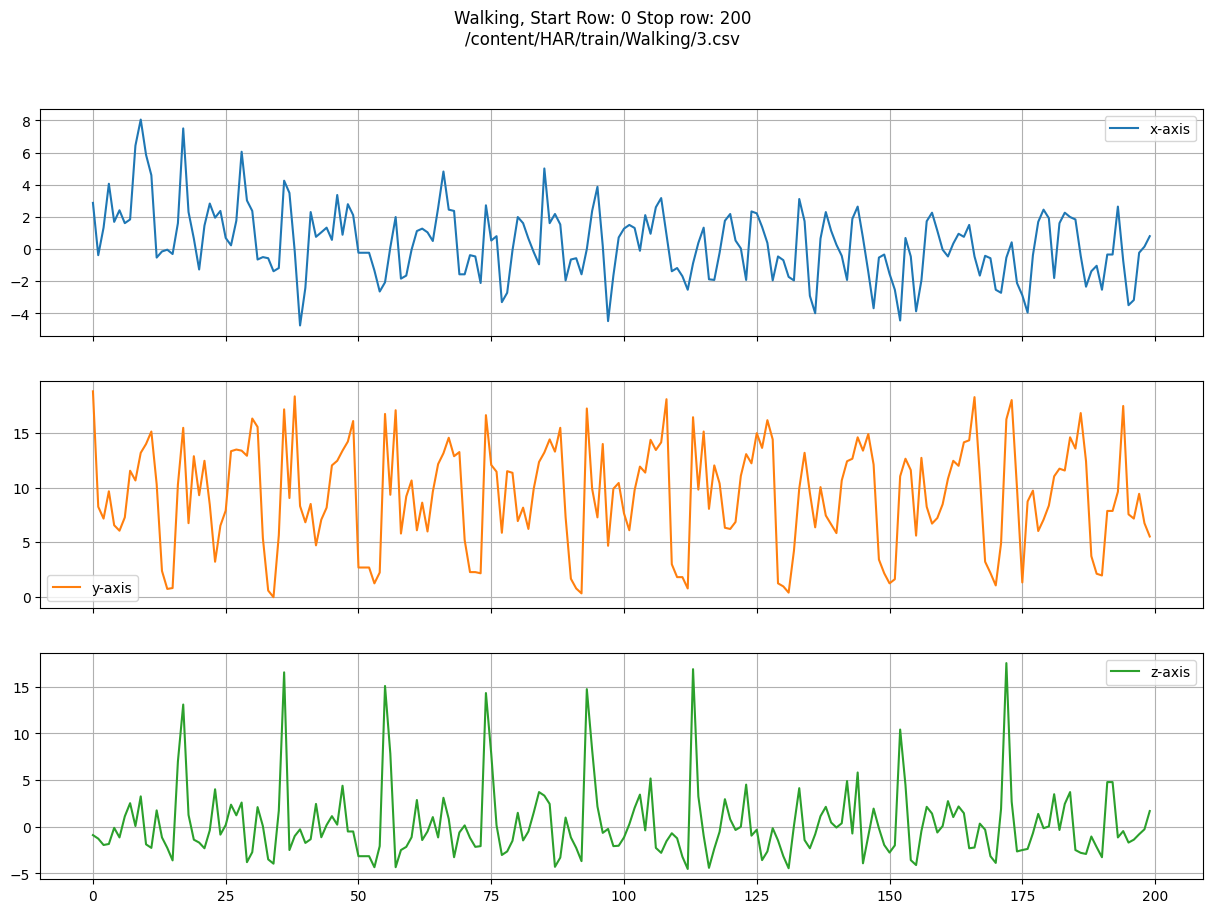

In [ ]:
path = df_paths[4]
activity, filename = path.split('/')[-2:]  # path = /content/HAR/train/Downstairs/1.csv; activity = Downstairs; filename = 1.csv
df = pd.read_csv(path)

plot_activity(activity,df)

# Training, Validation (Separate Data)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
glob(os.path.join("/content/HAR/train/Sitting",'*.csv'))

['/content/HAR/train/Sitting/7.csv',
 '/content/HAR/train/Sitting/24.csv',
 '/content/HAR/train/Sitting/4.csv',
 '/content/HAR/train/Sitting/3.csv',
 '/content/HAR/train/Sitting/18.csv',
 '/content/HAR/train/Sitting/20.csv',
 '/content/HAR/train/Sitting/21.csv',
 '/content/HAR/train/Sitting/5.csv',
 '/content/HAR/train/Sitting/13.csv',
 '/content/HAR/train/Sitting/19.csv',
 '/content/HAR/train/Sitting/27.csv',
 '/content/HAR/train/Sitting/6.csv',
 '/content/HAR/train/Sitting/12.csv',
 '/content/HAR/train/Sitting/8.csv',
 '/content/HAR/train/Sitting/16.csv',
 '/content/HAR/train/Sitting/30.csv',
 '/content/HAR/train/Sitting/35.csv']

In [ ]:
# split train folder into train and validation
split_train = 0.8

In [ ]:
dataset_paths = {
    'train':[],
    'val':[]
}

for activity_dir in glob(os.path.join(train_dir,'*')):                              # ทุกๆ Activity ใน Folder Sitting, Walking, Downstairs, Standing, Upstairs, Jogging
    paths = glob(os.path.join(activity_dir,'*.csv'))                                # ไฟล์แต่ละ activity ['/content/HAR/train/Sitting/35.csv', '/content/HAR/train/Sitting/12.csv', ...+
    train_paths, val_paths = train_test_split(paths,test_size= (1-split_train),random_state=42)  # แบ่งอัตรส่วนของแต่ละไฟล์
    dataset_paths['train'].extend(train_paths)
    dataset_paths['val'].extend(val_paths)

In [ ]:
print("Ratio of split_train :",split_train)
print("Train data :",len(dataset_paths['train']))
print("Val data :",len(dataset_paths['val']))

Ratio of split_train : 0.8
Train data : 111
Val data : 32


In [ ]:
# # Manualy แก้มือ
# dataset_paths = {'train': ['/content/HAR/train/Sitting/19.csv',
#   '/content/HAR/train/Sitting/4.csv',
#   '/content/HAR/train/Sitting/16.csv',
#   '/content/HAR/train/Sitting/3.csv',
#   '/content/HAR/train/Sitting/20.csv',
#   '/content/HAR/train/Sitting/8.csv',
#   '/content/HAR/train/Sitting/7.csv',
#   '/content/HAR/train/Sitting/24.csv',
#   '/content/HAR/train/Sitting/5.csv',
#   '/content/HAR/train/Sitting/21.csv',
#   '/content/HAR/train/Sitting/27.csv',
#   '/content/HAR/train/Sitting/30.csv',
#   '/content/HAR/train/Sitting/6.csv',
#   '/content/HAR/train/Walking/2.csv',
#   '/content/HAR/train/Walking/4.csv',
#   '/content/HAR/train/Walking/6.csv',
#   '/content/HAR/train/Walking/35.csv',
#   '/content/HAR/train/Walking/22.csv',
#   '/content/HAR/train/Walking/11.csv',
#   '/content/HAR/train/Walking/14.csv',
#   '/content/HAR/train/Walking/5.csv',
#   '/content/HAR/train/Walking/25.csv',
#   '/content/HAR/train/Walking/3.csv',
#   '/content/HAR/train/Walking/1.csv',
#   '/content/HAR/train/Walking/10.csv',
#   '/content/HAR/train/Walking/18.csv',
#   '/content/HAR/train/Walking/12.csv',
#   '/content/HAR/train/Walking/27.csv',
#   '/content/HAR/train/Walking/17.csv',
#   '/content/HAR/train/Walking/21.csv',
#   '/content/HAR/train/Walking/7.csv',
#   '/content/HAR/train/Walking/19.csv',
#   '/content/HAR/train/Walking/30.csv',
#   '/content/HAR/train/Walking/13.csv',
#   '/content/HAR/train/Walking/9.csv',
#   '/content/HAR/train/Walking/28.csv',
#   '/content/HAR/train/Walking/20.csv',
#   '/content/HAR/train/Downstairs/11.csv',
#   '/content/HAR/train/Downstairs/10.csv',
#   '/content/HAR/train/Downstairs/17.csv',
#   '/content/HAR/train/Downstairs/20.csv',
#   '/content/HAR/train/Downstairs/12.csv',
#   '/content/HAR/train/Downstairs/16.csv',
#   '/content/HAR/train/Downstairs/21.csv',
#   '/content/HAR/train/Downstairs/22.csv',
#   '/content/HAR/train/Downstairs/14.csv',
#   '/content/HAR/train/Downstairs/4.csv',
#   '/content/HAR/train/Downstairs/19.csv',
#   '/content/HAR/train/Downstairs/18.csv',
#   '/content/HAR/train/Downstairs/27.csv',
#   '/content/HAR/train/Downstairs/7.csv',
#   '/content/HAR/train/Downstairs/23.csv',
#   '/content/HAR/train/Downstairs/26.csv',
#   '/content/HAR/train/Downstairs/6.csv',
#   '/content/HAR/train/Downstairs/8.csv',
#   '/content/HAR/train/Downstairs/3.csv',
#   '/content/HAR/train/Downstairs/30.csv',
#   '/content/HAR/train/Standing/20.csv',
#   '/content/HAR/train/Standing/19.csv',
#   '/content/HAR/train/Standing/18.csv',
#   '/content/HAR/train/Standing/3.csv',
#   '/content/HAR/train/Standing/21.csv',
#   '/content/HAR/train/Standing/12.csv',
#   '/content/HAR/train/Standing/16.csv',
#   '/content/HAR/train/Standing/7.csv',
#   '/content/HAR/train/Standing/30.csv',
#   '/content/HAR/train/Standing/28.csv',
#   '/content/HAR/train/Standing/6.csv',
#   '/content/HAR/train/Standing/8.csv',
#   '/content/HAR/train/Standing/27.csv',
#   '/content/HAR/train/Standing/13.csv',
#   '/content/HAR/train/Upstairs/11.csv',
#   '/content/HAR/train/Upstairs/10.csv',
#   '/content/HAR/train/Upstairs/17.csv',
#   '/content/HAR/train/Upstairs/20.csv',
#   '/content/HAR/train/Upstairs/12.csv',
#   '/content/HAR/train/Upstairs/16.csv',
#   '/content/HAR/train/Upstairs/21.csv',
#   '/content/HAR/train/Upstairs/22.csv',
#   '/content/HAR/train/Upstairs/14.csv',
#   '/content/HAR/train/Upstairs/4.csv',
#   '/content/HAR/train/Upstairs/19.csv',
#   '/content/HAR/train/Upstairs/18.csv',
#   '/content/HAR/train/Upstairs/27.csv',
#   '/content/HAR/train/Upstairs/7.csv',
#   '/content/HAR/train/Upstairs/23.csv',
#   '/content/HAR/train/Upstairs/26.csv',
#   '/content/HAR/train/Upstairs/6.csv',
#   '/content/HAR/train/Upstairs/8.csv',
#   '/content/HAR/train/Upstairs/3.csv',
#   '/content/HAR/train/Upstairs/30.csv',
#   '/content/HAR/train/Jogging/11.csv',
#   '/content/HAR/train/Jogging/1.csv',
#   '/content/HAR/train/Jogging/15.csv',
#   '/content/HAR/train/Jogging/14.csv',
#   '/content/HAR/train/Jogging/10.csv',
#   '/content/HAR/train/Jogging/5.csv',
#   '/content/HAR/train/Jogging/21.csv',
#   '/content/HAR/train/Jogging/12.csv',
#   '/content/HAR/train/Jogging/22.csv',
#   '/content/HAR/train/Jogging/18.csv',
#   '/content/HAR/train/Jogging/27.csv',
#   '/content/HAR/train/Jogging/17.csv',
#   '/content/HAR/train/Jogging/3.csv',
#   '/content/HAR/train/Jogging/7.csv',
#   '/content/HAR/train/Jogging/4.csv',
#   '/content/HAR/train/Jogging/26.csv',
#   '/content/HAR/train/Jogging/25.csv',
#   '/content/HAR/train/Jogging/8.csv',
#   '/content/HAR/train/Jogging/23.csv',
#   '/content/HAR/train/Jogging/20.csv'],
#  'val': ['/content/HAR/train/Sitting/35.csv',
#   '/content/HAR/train/Sitting/12.csv',
#   '/content/HAR/train/Sitting/13.csv',
#   '/content/HAR/train/Sitting/18.csv',
#   '/content/HAR/train/Walking/15.csv',
#   '/content/HAR/train/Walking/16.csv',
#   '/content/HAR/train/Walking/23.csv',
#   '/content/HAR/train/Walking/8.csv',
#   '/content/HAR/train/Walking/26.csv',
#   '/content/HAR/train/Walking/24.csv',
#   '/content/HAR/train/Downstairs/24.csv',
#   '/content/HAR/train/Downstairs/28.csv',
#   '/content/HAR/train/Downstairs/1.csv',
#   '/content/HAR/train/Downstairs/15.csv',
#   '/content/HAR/train/Downstairs/5.csv',
#   '/content/HAR/train/Downstairs/13.csv',
#   '/content/HAR/train/Standing/35.csv',
#   '/content/HAR/train/Standing/10.csv',
#   '/content/HAR/train/Standing/5.csv',
#   '/content/HAR/train/Standing/24.csv',
#   '/content/HAR/train/Upstairs/24.csv',
#   '/content/HAR/train/Upstairs/28.csv',
#   '/content/HAR/train/Upstairs/1.csv',
#   '/content/HAR/train/Upstairs/15.csv',
#   '/content/HAR/train/Upstairs/5.csv',
#   '/content/HAR/train/Upstairs/13.csv',
#   '/content/HAR/train/Jogging/24.csv',
#   '/content/HAR/train/Jogging/19.csv',
#   '/content/HAR/train/Jogging/35.csv',
#   '/content/HAR/train/Jogging/2.csv',
#   '/content/HAR/train/Jogging/6.csv',
#   '/content/HAR/train/Jogging/13.csv']}

# Load Dataset

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
def frame(x, frame_len, hop_len):
    '''Slice a 3D data array into (overlapping) frames.

    Example
    --------
    >>> x = np.array([[0, 1, 2],
                      [10, 11, 12],
                      [20, 21, 22],
                      [30, 31, 32],
                      [40, 41, 42],
                      [50, 51, 52],
                      [60, 61, 62]])
    >>> frames = x.frame(x, 3, 2)
    >>> x.shape
    (7, 3)
    >>> frames.shape
    (3, 3, 3)
    '''

    assert(x.shape[0] >= frame_len)                                             # Check ว่า True เปล่า
    assert(hop_len >= 1)                                                        # Check ว่า True เปล่า

    n_frames = 1 + (x.shape[0] - frame_len) // hop_len
    shape = (n_frames, frame_len, x.shape[1])
    strides = ((hop_len * x.strides[0],) + x.strides)
    return np.lib.stride_tricks.as_strided(x, shape=shape, strides=strides)

In [ ]:
# Parameter for data segmentation
frame_len = 100
hop_len = 50

In [ ]:
# Window slide data
dataset_blocks = {
    'train':{'block':[],'label':[]},
    'val':{'block':[],'label':[]}
}

for dataset in ['train','val']:
    paths = dataset_paths[dataset]            # ดึง .csv ของ Train, Val ออกมา
    for path in paths:
        activity = path.split(os.sep)[-2]     # Sep คือ separate ใช้เหมือน split("/") แต่
        df = pd.read_csv(path)

        # Preprocessing
        mms = StandardScaler()
        for feature in list(df.columns):
            df[feature] = mms.fit_transform(df[[feature]])                      # transform ที่ละ columns
        samples = frame(df.loc[:, ].values, frame_len, hop_len)
        labels = np.full(samples.shape[0], activity)                            # เติม label ให้เต็ม samplieng shape

        dataset_blocks[dataset]['block'].extend(samples)
        dataset_blocks[dataset]['label'].extend(labels)

    dataset_blocks[dataset]['block'] = np.array(dataset_blocks[dataset]['block'])
    dataset_blocks[dataset]['label'] = np.array(dataset_blocks[dataset]['label'])

In [ ]:
dataset_blocks

{'train': {'block': array([[[-0.50966244, -0.06004419, -0.75531936],
          [-0.2690092 ,  0.32445646, -0.93711665],
          [-0.11392155,  0.71900942, -0.68767379],
          ...,
          [-0.55779309, -1.01501312, -0.25643356],
          [-1.50079727, -0.92956853, -0.82719267],
          [-1.62914566, -1.50254989, -0.31562338]],
  
         [[ 0.2140799 ,  0.43000566, -0.50587644],
          [-0.47579272,  2.01826978, -0.50587644],
          [-0.75566353,  1.34476537, -0.12537034],
          ...,
          [-1.28866589, -0.56265942, -0.63693966],
          [-0.93214257, -0.59030325, -0.35367401],
          [-0.67188055, -0.22339414, -0.51856   ]],
  
         [[ 0.26934101, -0.10025341,  2.79607102],
          [ 2.41382878,  1.43020996,  0.11138901],
          [-0.28327013, -0.87930701, -0.81873704],
          ...,
          [ 0.93247439,  0.13346268,  2.52548883],
          [-0.15492174,  0.74916633, -0.41286386],
          [-0.26366135,  2.58622499, -0.95825595]],
  
       

In [ ]:
# batch, rows, columns
print("Train Data :",dataset_blocks['train']['block'].shape)
print("Val Data   :",dataset_blocks['val']['block'].shape)

Train Data : (13205, 100, 3)
Val Data   : (4229, 100, 3)


In [ ]:
dataset_blocks['train']['label'][:2]

array(['Walking', 'Walking'], dtype='<U10')

In [ ]:
dataset_blocks['train']['block'][:2]

array([[[-0.50966244, -0.06004419, -0.75531936],
        [-0.2690092 ,  0.32445646, -0.93711665],
        [-0.11392155,  0.71900942, -0.68767379],
        [ 0.42442866,  0.51545025,  2.40710922],
        [ 0.24794961,  0.14854113, -1.16119252],
        [ 0.43155912,  0.4576495 , -0.93711665],
        [ 0.44760267,  0.45011027,  2.14498278],
        [-0.54353215,  1.26937309, -0.60311689],
        [-0.73605475,  2.22182895, -0.45937015],
        [-0.73605475,  0.48780641, -0.44668663],
        [-0.63801083, -1.02506543,  0.06488271],
        [-0.84479436, -0.43449253, -0.35367401],
        [-1.50079727, -1.3015038 , -0.64962322],
        [-1.34927486, -1.78401442, -0.32830696],
        [ 1.72395616,  0.77681017,  2.69037479],
        [ 1.63482533,  0.32445646,  0.80052784],
        [-0.74853306, -1.0904054 , -0.9455724 ],
        [-0.24226995,  2.42287504,  2.17880549],
        [-1.63627613, -0.50485866, -0.47205367],
        [-0.96066444, -0.36663948, -0.74686367],
        [-0.84479436

# One Hot Encode Labels

In [ ]:
LABELS = os_sorted([os.path.split(path)[-1] for path in glob(os.path.join(train_dir, '*'))])          # os_sorted(['a','c','b']) -> ['a', 'b', 'c']
LABELS

['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs', 'Walking']

In [ ]:
for dataset in ['train', 'val']:
    labels = dataset_blocks[dataset]['label']
    one_hot_encoded = np.zeros((labels.size, len(LABELS)))                # [0., 0., 0., 0., 0., 0.],     สร้าง 0 เอาไว้เตรียม เปลี่ยนเป็น onehot

    for idx, label in enumerate(LABELS):
        index = np.where(labels == label)[0]                              # ตรวจ label แต่ละตัว
        one_hot_encoded[index, idx] = 1

    dataset_blocks[dataset]['label'] = one_hot_encoded

In [ ]:
dataset_blocks['train']

{'block': array([[[-0.50966244, -0.06004419, -0.75531936],
         [-0.2690092 ,  0.32445646, -0.93711665],
         [-0.11392155,  0.71900942, -0.68767379],
         ...,
         [-0.55779309, -1.01501312, -0.25643356],
         [-1.50079727, -0.92956853, -0.82719267],
         [-1.62914566, -1.50254989, -0.31562338]],
 
        [[ 0.2140799 ,  0.43000566, -0.50587644],
         [-0.47579272,  2.01826978, -0.50587644],
         [-0.75566353,  1.34476537, -0.12537034],
         ...,
         [-1.28866589, -0.56265942, -0.63693966],
         [-0.93214257, -0.59030325, -0.35367401],
         [-0.67188055, -0.22339414, -0.51856   ]],
 
        [[ 0.26934101, -0.10025341,  2.79607102],
         [ 2.41382878,  1.43020996,  0.11138901],
         [-0.28327013, -0.87930701, -0.81873704],
         ...,
         [ 0.93247439,  0.13346268,  2.52548883],
         [-0.15492174,  0.74916633, -0.41286386],
         [-0.26366135,  2.58622499, -0.95825595]],
 
        ...,
 
        [[-1.25335712, -0

In [ ]:
dataset_blocks['val']['label'][:10]

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

# Visulaize

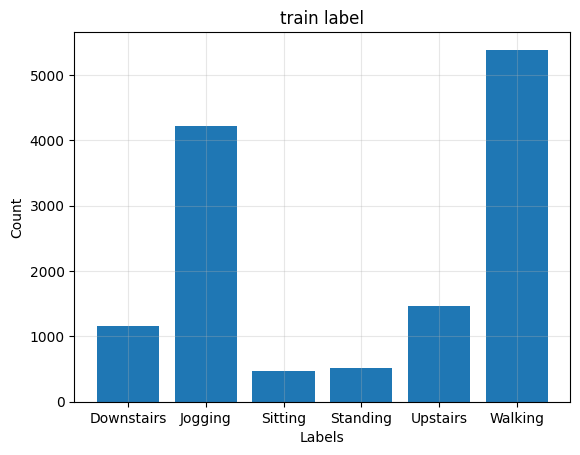

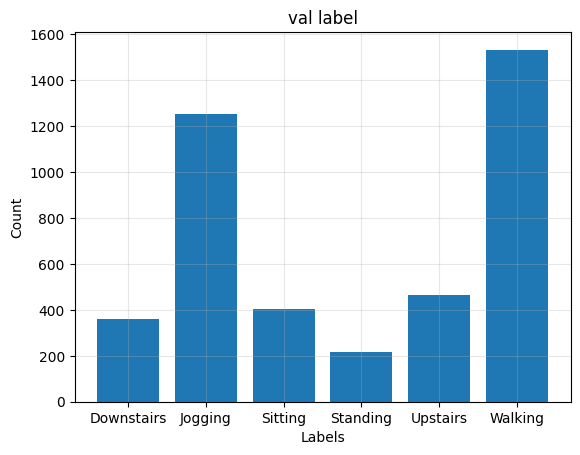

In [ ]:
for dataset in ['train', 'val']:
    labels = dataset_blocks[dataset]['label']

    labels_sum = labels.sum(axis=0)             # Some freq

    # Plotting
    plt.bar(LABELS, labels_sum)
    plt.title(f'{dataset} label')
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.grid(alpha=0.3)
    plt.show()

# Model

In [ ]:
# Get the input shape -> (samples, time steps, features)
X_train = dataset_blocks['train']['block']
Y_train = dataset_blocks['train']['label']

n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], Y_train.shape[1]
print(f'n_timesteps: {n_timesteps}, n_features: {n_features}, n_outputs: {n_outputs}')

n_timesteps: 100, n_features: 3, n_outputs: 6


In [ ]:
# # Model 1
# import keras
# from keras.models import Sequential
# from keras.layers import Conv1D, MaxPooling1D, Input, Dense, Dropout, Flatten

# model = Sequential()
# model.add(Input(shape=(n_timesteps,n_features)))
# model.add(Conv1D(16, 8, activation='relu'))
# model.add(MaxPooling1D())
# model.add(Flatten())
# model.add(Dense(n_outputs, activation='softmax'))

# model.summary()

In [ ]:
# # Model 2
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, LSTM, Bidirectional, GRU
# from tensorflow.keras.optimizers import Adam

# # Define the model
# model = Sequential()
# model.add(Input(shape=(n_timesteps, n_features)))
# model.add(Conv1D(64, 8, activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv1D(128, 8, activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling1D(2))
# model.add(Dropout(0.5))
# model.add(Bidirectional(LSTM(100, return_sequences=True)))
# model.add(Bidirectional(GRU(100)))
# model.add(Dropout(0.5))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(n_outputs, activation='softmax'))

# # Compile the model
# optimizer = Adam(learning_rate=1e-4)
# model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Model summary
# model.summary()


In [ ]:
# Model 3
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, LSTM

model = Sequential()
model.add(Input(shape=(n_timesteps, n_features)))
model.add(Conv1D(64, 8, activation='relu'))
model.add(BatchNormalization())
model.add(Conv1D(128, 8, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 93, 64)            1600      
                                                                 
 batch_normalization (Batch  (None, 93, 64)            256       
 Normalization)                                                  
                                                                 
 conv1d_1 (Conv1D)           (None, 86, 128)           65664     
                                                                 
 batch_normalization_1 (Bat  (None, 86, 128)           512       
 chNormalization)                                                
                                                                 
 max_pooling1d (MaxPooling1  (None, 43, 128)           0         
 D)                                                              
                                                        

# Training

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath= '/content/working/best_cnn_model.weights.h5',
        monitor='val_loss', save_best_only=True, save_weights_only=True
    ),
]

In [ ]:
# Parameter for models
epochs = 1 #3
batch_size = 64 #64

history = model.fit(dataset_blocks['train']['block'],
                    dataset_blocks['train']['label'],
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(dataset_blocks['val']['block'],
                                     dataset_blocks['val']['label']),
                    callbacks=callbacks_list,
                    verbose=1)
# evaluate model
loss, accuracy = model.evaluate(dataset_blocks['val']['block'],
                                dataset_blocks['val']['label'], batch_size=batch_size, verbose=0)
print(f'Loss : {loss}')
print(f'Accuracy: {accuracy}')

207/207 [==============================] - 3s 14ms/step - loss: 0.2907 - accuracy: 0.8834 - val_loss: 0.6612 - val_accuracy: 0.8269
Loss : 0.6612474918365479
Accuracy: 0.8269094228744507


In [ ]:
# import matplotlib.pyplot as plt

# history_dict = history.history

# acc = history_dict['accuracy']
# val_acc = history_dict['val_accuracy']
# loss = history_dict['loss']
# val_loss = history_dict['val_loss']

# epochs = range(1, len(acc) + 1)

# # "bo" is for "blue dot"
# plt.plot(epochs, loss, 'b', label='Training loss')
# # b is for "solid blue line"
# plt.plot(epochs, val_loss, 'r', label='Validation loss')
# plt.title('Training and validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# plt.show()

# Validation

In [ ]:
# evaluate model
loss, accuracy = model.evaluate(dataset_blocks['val']['block'],
                                dataset_blocks['val']['label'], batch_size=batch_size, verbose=0)
print(f'Loss : {loss}')
print(f'Accuracy: {accuracy}')

Loss : 1.6534173488616943
Accuracy: 0.49184203147888184


# Submission

In [ ]:
from sklearn.preprocessing import StandardScaler

answer_list = []

for filename in tqdm(glob(test_dir + '/*.csv')):  # Get all test file list name
    # Read test csv file
    df = pd.read_csv(filename)
    if df.shape[0] != 200:
        print(filename)
        break
    # Preprocessing
    # mms = StandardScaler()
    # for feature in list(df.columns):
    #     df[feature] = mms.fit_transform(df[[feature]])   # Transform

    # samples = df.loc[:, ].values   # df.loc[:10,['x-axis','y-axis','z-axis']]

    # # Predict
    # y_pred_prob = model.predict(np.array(samples).reshape(-1,frame_len,n_features), verbose = 0)  # Get prop of  shape (-1,100,3)
    # y_pred = np.argmax(y_pred_prob, axis=1)  # Get class number
    # class_names = LABELS[y_pred[0]]   # Get class

    # value = (filename.split('/')[-1], class_names)   # filename, class
    # answer_list.append(value)

100%|██████████| 693/693 [00:01<00:00, 575.09it/s]


In [ ]:
import pandas as pd
column_name = ['id','class']
xml_df = pd.DataFrame(answer_list, columns=column_name)
xml_df.to_csv('/content/x.csv', index=None)

# Prediction testing

In [ ]:
df = pd.read_csv("/content/HAR/test/084eccd6-193b-4a61-b25d-6137c36abadb.csv")
df.shape[0]

200

In [ ]:
for filename in tqdm(glob(test_dir + '/*.csv')):
    df = pd.read_csv(filename)
    break

  0%|          | 0/693 [00:00<?, ?it/s]

/content/HAR/test/ee554c32-40d7-4e73-afd8-d1f008273152.csv


In [ ]:
df

,x-axis,y-axis,z-axis
0,-0.72,9.70,-0.38
1,0.46,9.51,-0.50
2,0.50,8.77,0.08
3,-0.65,10.08,-0.61
4,0.23,10.53,-0.84
...,...,...,...
195,0.91,11.45,-2.37
196,-2.34,17.77,-2.96
197,-5.48,6.63,-0.46
198,-2.11,3.57,-0.04


In [ ]:
mms = StandardScaler()
for feature in list(df.columns):
    df[feature] = mms.fit_transform(df[[feature]])   # Transform
samples = df.loc[:, ].values   # df.loc[:10,['x-axis','y-axis','z-axis']]

In [ ]:
y_pred_prob = model.predict(np.array(samples).reshape(-1,frame_len,n_features),verbose=0)
y_pred_prob

array([[9.6236775e-03, 1.6895436e-03, 3.4255916e-04, 6.9043675e-04,
        4.4249427e-02, 9.4340432e-01],
       [2.4722167e-04, 3.0100304e-05, 2.8969980e-06, 7.9176289e-06,
        1.0358053e-04, 9.9960834e-01]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_pred_prob, axis=1)  # Get class number
y_pred

array([5, 5])

In [ ]:
class_names = LABELS[y_pred[0]]   # Get class
class_names

'Walking'